<a href="https://colab.research.google.com/github/sandeep92134/PYTHON-Data-Cleaning/blob/master/Chapter%205/Exersize%205.%20Using%20scatter%20plots%20to%20view%20bivariate%20relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load pandas, numpy, matplotlib, the Axes3D module, and seaborn:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
landtemps = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%205/datasets/landtemps2019avgs.csv")

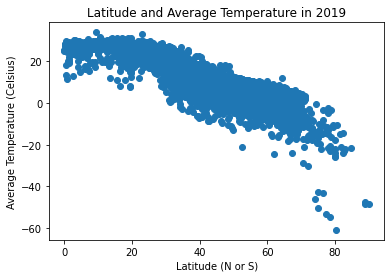

In [2]:
# Run a scatter plot of latitude (latabs) by average temperature:
plt.scatter(x="latabs", y="avgtemp", data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.show()

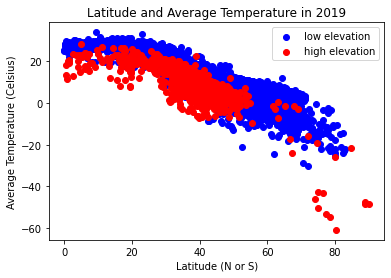

In [3]:
# Show the high elevation points in red.
low, high = landtemps.loc[landtemps.elevation<=1000], landtemps.loc[landtemps.elevation>1000]
plt.scatter(x="latabs", y="avgtemp", c="blue", data=low)
plt.scatter(x="latabs", y="avgtemp", c="red", data=high)
plt.legend(('low elevation', 'high elevation'))
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2019")
plt.show()

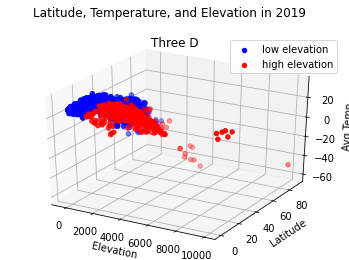

In [4]:
# View a three-dimensional plot of temperature, latitude, and elevation.
fig = plt.figure()
plt.suptitle("Latitude, Temperature, and Elevation in 2019")
ax = plt.axes(projection='3d')
ax.set_title('Three D')
ax.set_xlabel("Elevation")
ax.set_ylabel("Latitude")
ax.set_zlabel("Avg Temp")
ax.scatter3D(low.elevation, low.latabs, low.avgtemp, label="low elevation", c="blue")
ax.scatter3D(high.elevation, high.latabs, high.avgtemp, label="high elevation", c="red")
ax.legend()
plt.show()

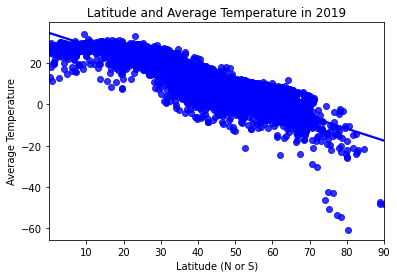

In [5]:
# Show a regression line of latitude on the temperature data.
# Use regplot to get a regression line:
sns.regplot(x="latabs", y="avgtemp", color="blue", data=landtemps)
plt.title("Latitude and Average Temperature in 2019")
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.show()

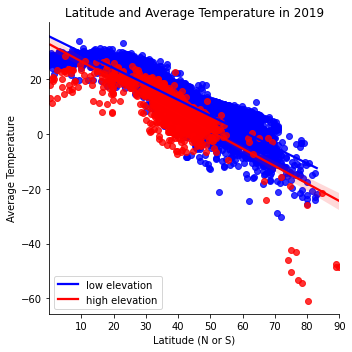

In [6]:
# Show separate regression lines for low and high elevation stations
landtemps['elevation_group'] = np.where(landtemps.elevation<=1000,'low','high')
sns.lmplot(x="latabs", y="avgtemp", hue="elevation_group", palette=dict(low="blue", high="red"), legend_out=False, data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.legend(('low elevation', 'high elevation'), loc='lower left')
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.tight_layout()
plt.show()

In [7]:
# Show some stations above the low and high elevation regression lines:
high.loc[(high.latabs>38) & (high.avgtemp>=18),
  ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
3943,LAJES_AB,Portugal,38.7303,1016.2,18.041667
5805,WILD_HORSE_6N,United States,38.9031,1438.7,22.770000


In [8]:
low.loc[(low.latabs>47) & (low.avgtemp>=14),
  ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
1048,SAANICHTON_CDA,Canada,48.6167,61.0,17.820000
1146,CLOVERDALE_EAST,Canada,49.1167,50.0,14.751667
6830,WINNIBIGOSHISH_DAM,United States,47.4306,400.8,18.370000
7125,WINIFRED,United States,47.5589,988.5,16.310000


In [9]:
# Show some stations below the low and high elevation regression lines:
high.loc[(high.latabs<5) & (high.avgtemp<18),
  ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
2250,BOGOTA_ELDORADO,Colombia,4.701,2548.0,14.766667
2272,SAN_LUIS,Colombia,0.862,2976.4,11.320833
2303,IZOBAMBA,Ecuador,0.350,3058.0,13.220000
2306,CANAR,Ecuador,2.550,3083.0,13.036364
2307,LOJA_LA_ARGELIA,Ecuador,4.033,2160.0,17.140909


In [10]:
low.loc[(low.latabs<50) & (low.avgtemp<-9),
  ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
1189,FT_STEELE_DANDY_CRK,Canada,49.5167,856.0,-12.190000
1547,BALDUR,Canada,49.2833,450.0,-10.856000
1833,POINTE_CLAVEAU,Canada,48.2667,4.0,-10.620000
1862,CHUTE_DES_PASSES,Canada,49.8333,398.0,-12.802500
6544,PRESQUE_ISLE,United States,46.6539,182.6,-9.696667
